In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
#!pip install missingno

In [2]:
air = pd.read_csv("datasets/Air_Quality.csv")

In [3]:
air.isnull().sum()

Date      0
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [4]:
air

,Date,Ozone,Solar,Wind,Temp
0,1976-05-01,41.0,190.0,7.4,67
1,1976-05-02,36.0,118.0,8.0,72
2,1976-05-03,12.0,149.0,12.6,74
3,1976-05-04,18.0,313.0,11.5,62
4,1976-05-05,NaN,NaN,14.3,56
...,...,...,...,...,...
148,1976-09-26,30.0,193.0,6.9,70
149,1976-09-27,NaN,145.0,13.2,77
150,1976-09-28,14.0,191.0,14.3,75
151,1976-09-29,18.0,131.0,8.0,76


In [5]:
air.head()

,Date,Ozone,Solar,Wind,Temp
0,1976-05-01,41.0,190.0,7.4,67
1,1976-05-02,36.0,118.0,8.0,72
2,1976-05-03,12.0,149.0,12.6,74
3,1976-05-04,18.0,313.0,11.5,62
4,1976-05-05,NaN,NaN,14.3,56


In [6]:
null_val = air.isnull().sum()
null_df = pd.DataFrame(null_val, columns=["Null Values"])
null_df["percentage"] = null_val/air.shape[0] *100
null_df

,Null Values,percentage
Date,0,0.000000
Ozone,37,24.183007
Solar,7,4.575163
Wind,0,0.000000
Temp,0,0.000000


In [5]:
air1 = air.copy()
air1['Date'] = pd.to_datetime(air1['Date'])  # Changing date to datetime data type
air1 = air1.set_index(['Date'])   # Changing date column to index

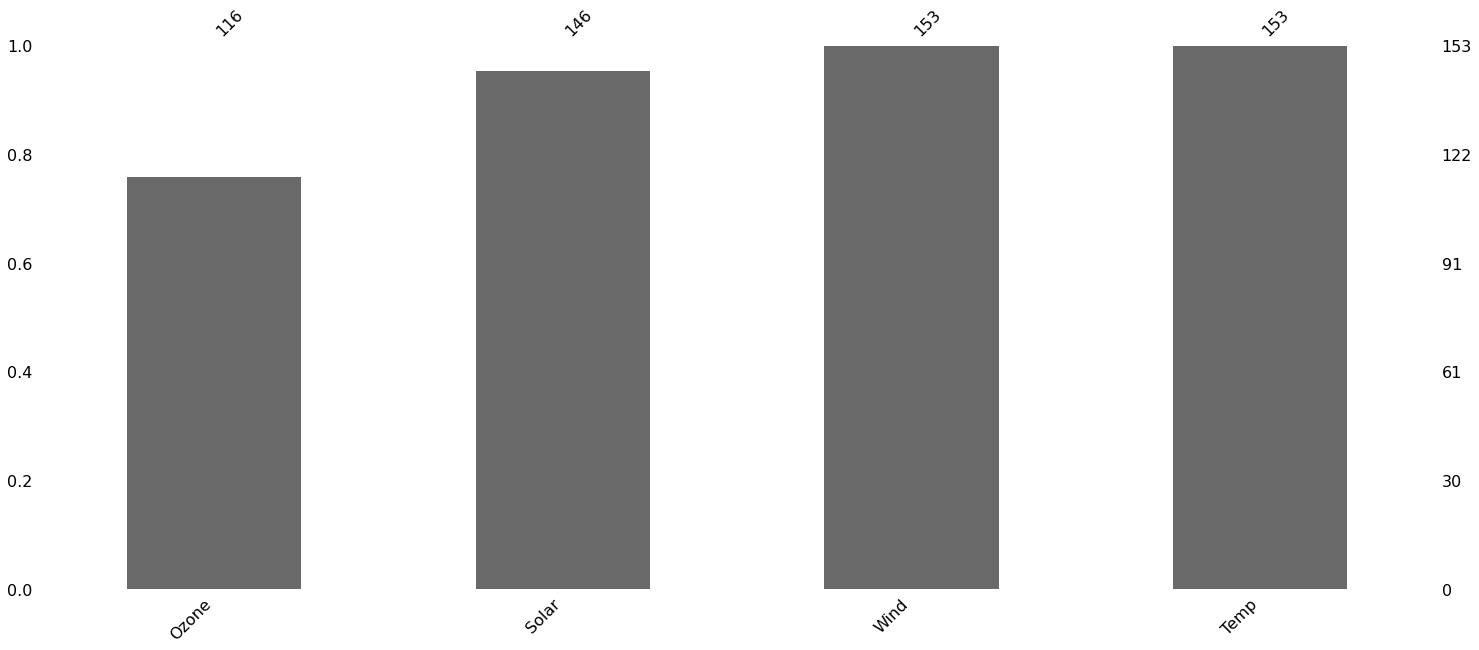

In [11]:
msno.bar(air1) # you can see pandas-profilin count part

plt.show()

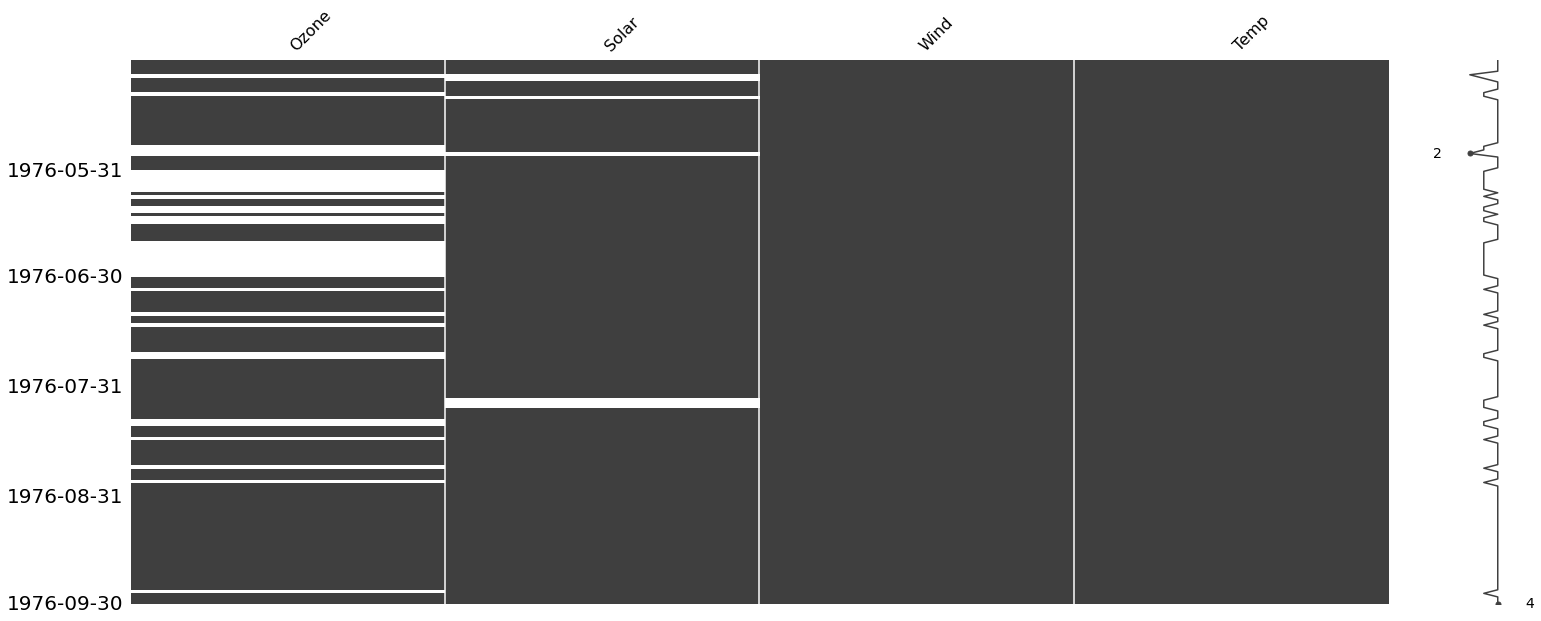

In [12]:
msno.matrix(air1, freq='M')
plt.show()

## Imputation Techniques:

### Fillna() Method :

Back fill      – bfill

Forward fill – ffill

### Interpolate() Method :

Linear

Quadratic

Nearest

Cubic

Derivatives

### Mean Imputation :

Rolling Mean

Seasonal Mean

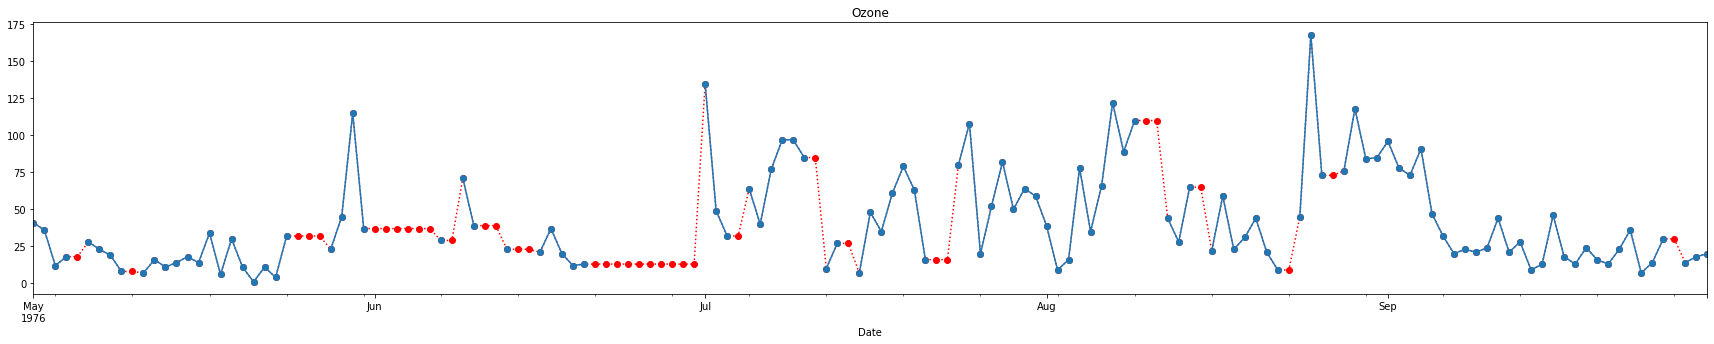

In [9]:
### Forward Fill
# Impute airquality DataFrame with ffill method
ffill_imputed = air1.copy(deep=True)

ffill_imputed.fillna(method='ffill',inplace=True)

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
air1['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

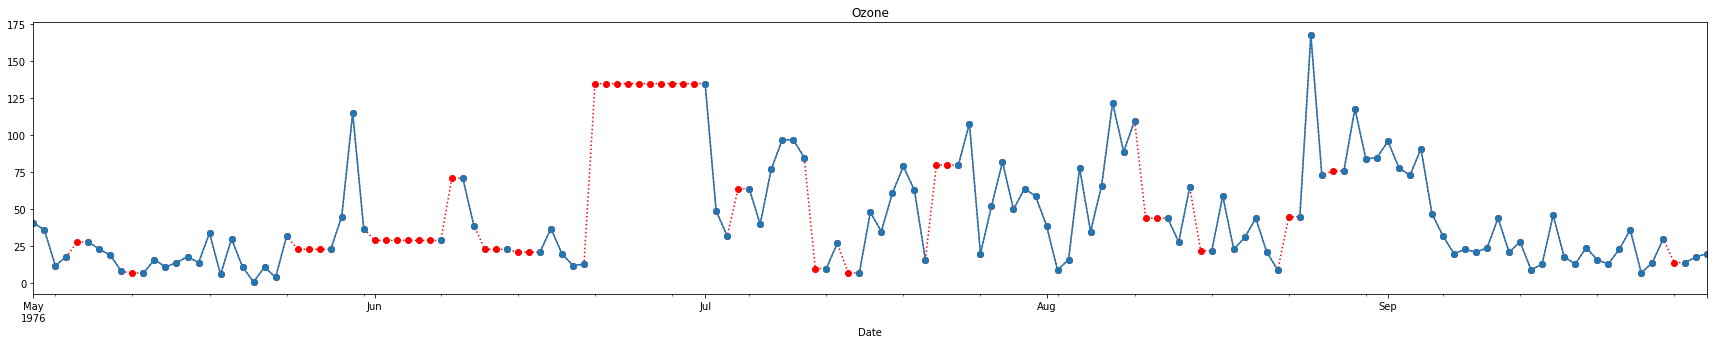

In [10]:
### Back Fill Fill
# Impute airquality DataFrame with bfill method
bfill_imputed = air1.copy(deep=True)

bfill_imputed.fillna(method='bfill',inplace=True)

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
air1['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

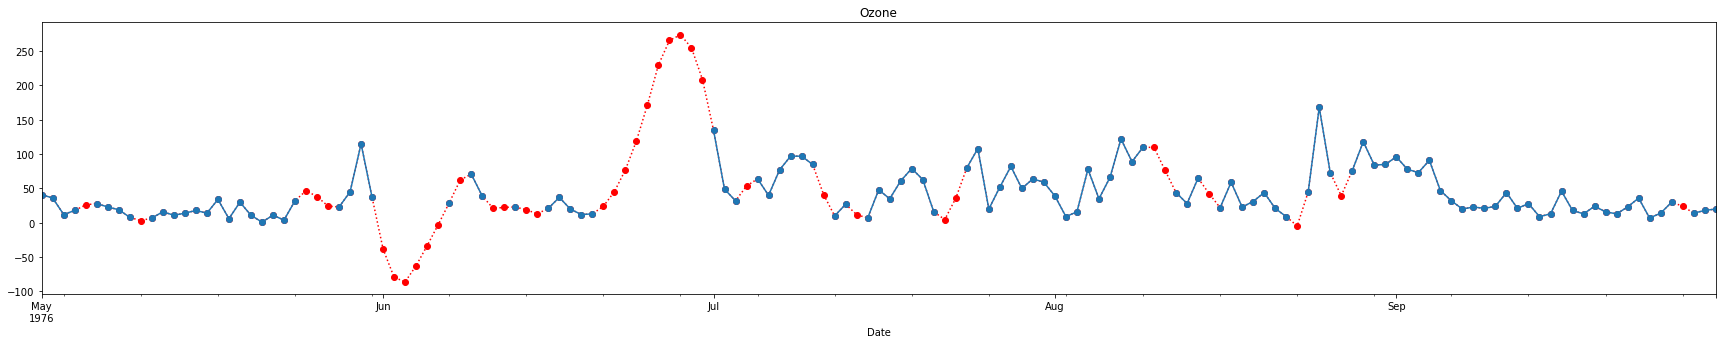

In [11]:
# Interpolate the NaNs quadratically

quadratic_imput=air1.copy(deep=True)

quadratic_imput.interpolate(method='quadratic', inplace=True)

quadratic_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

air1['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

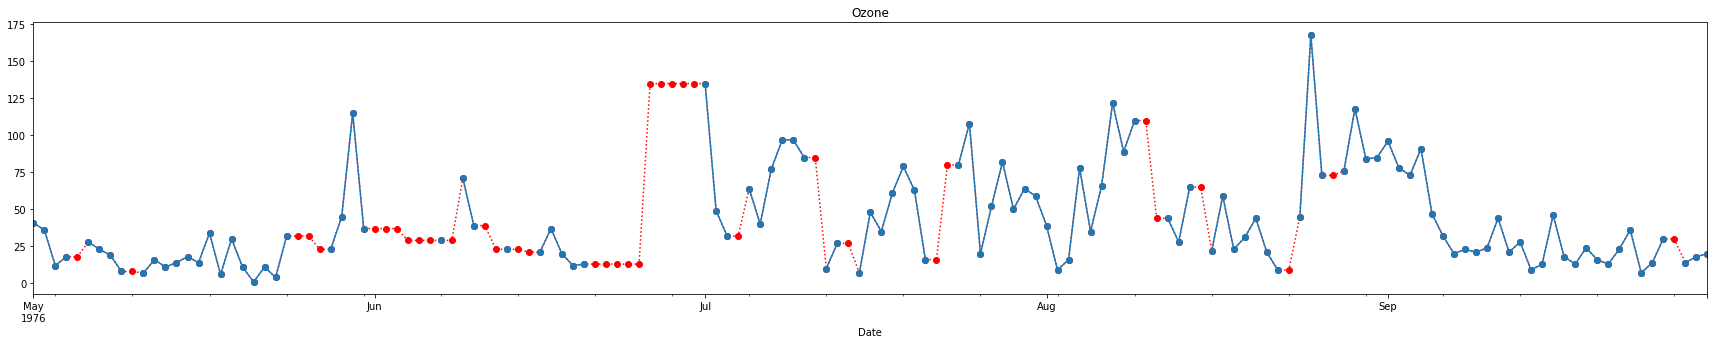

In [12]:
# Interpolate the NaNs by nearest method

nearest_imput=air1.copy(deep=True)

nearest_imput.interpolate(method='nearest', inplace=True)

nearest_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

air1['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

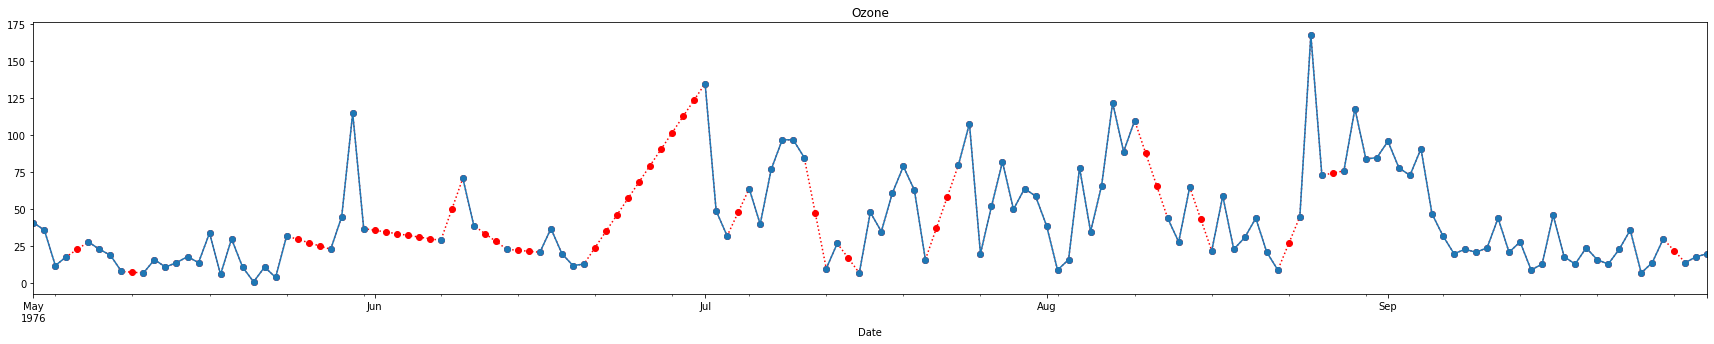

In [13]:
# Interpolate the NaNs by linear method

linear_imput=air1.copy(deep=True)

linear_imput.interpolate(method='linear', inplace=True)

linear_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

air1['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

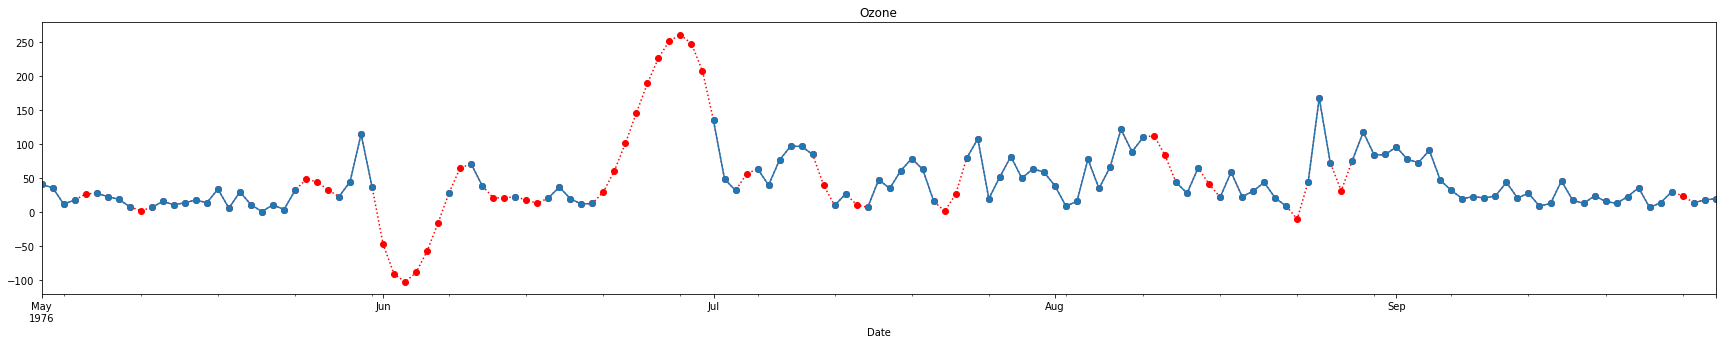

In [14]:
# Interpolate the NaNs by cubic method
cubic_imput=air1.copy(deep=True)

cubic_imput.interpolate(method='cubic', inplace=True)

cubic_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

air1['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

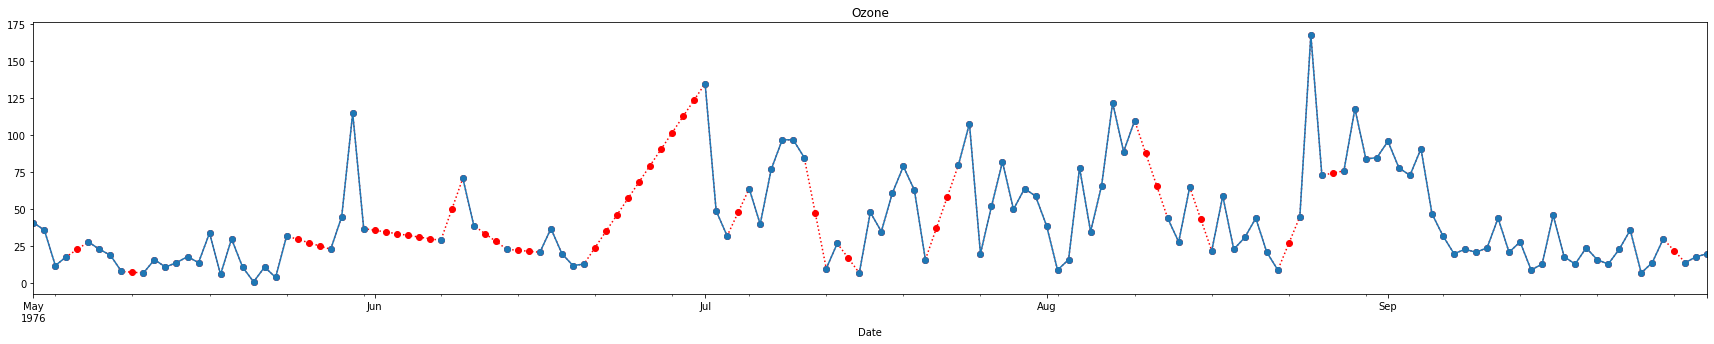

In [15]:
# Interpolate the NaNs by derivatives method
derivatives_imput=air1.copy(deep=True)

derivatives_imput.interpolate(method='from_derivatives', inplace=True)

derivatives_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

air1['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

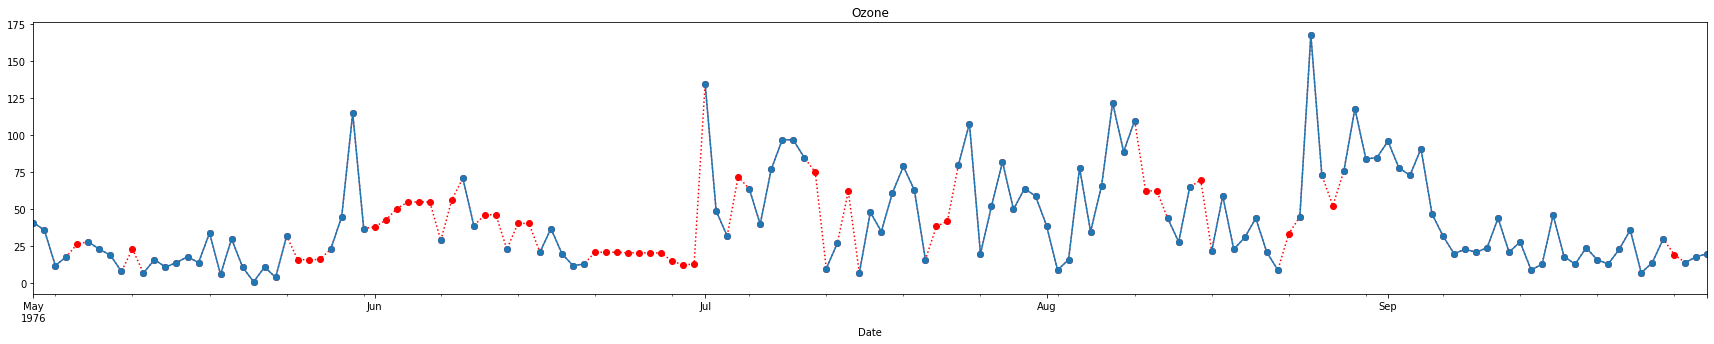

In [16]:
## Using Rolling Mean
roll_mean = air1.copy()
roll_mean = roll_mean.assign(Ozone=roll_mean.Ozone.fillna(roll_mean.Ozone.rolling(11,min_periods=1,).mean()))
roll_mean['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

air1['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

<ipython-input-19-c9f3cb7ac982>:7: RuntimeWarning: Mean of empty slice
  if np.isnan(np.nanmean(ts_seas)):


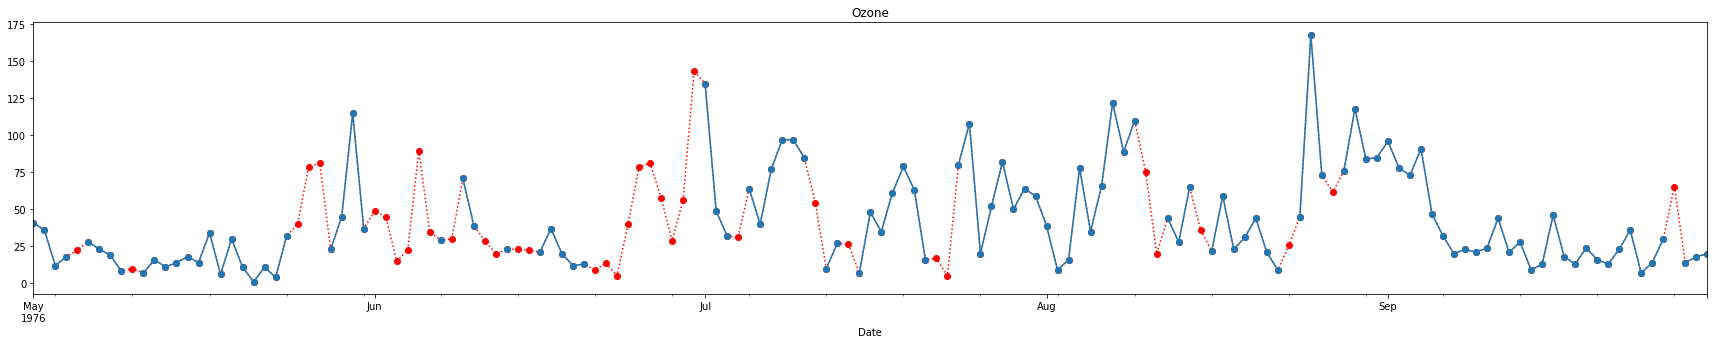

In [19]:
## Seasonal Mean
def seasonal_mean(ts, n, lr=0.7):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out
seasonal_imput=air1.copy(deep=True)
seasonal_imput['Ozone'] = seasonal_mean(seasonal_imput.Ozone, n=30, lr=1.25)
seasonal_imput['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

air1['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

## Comparing the Imputations

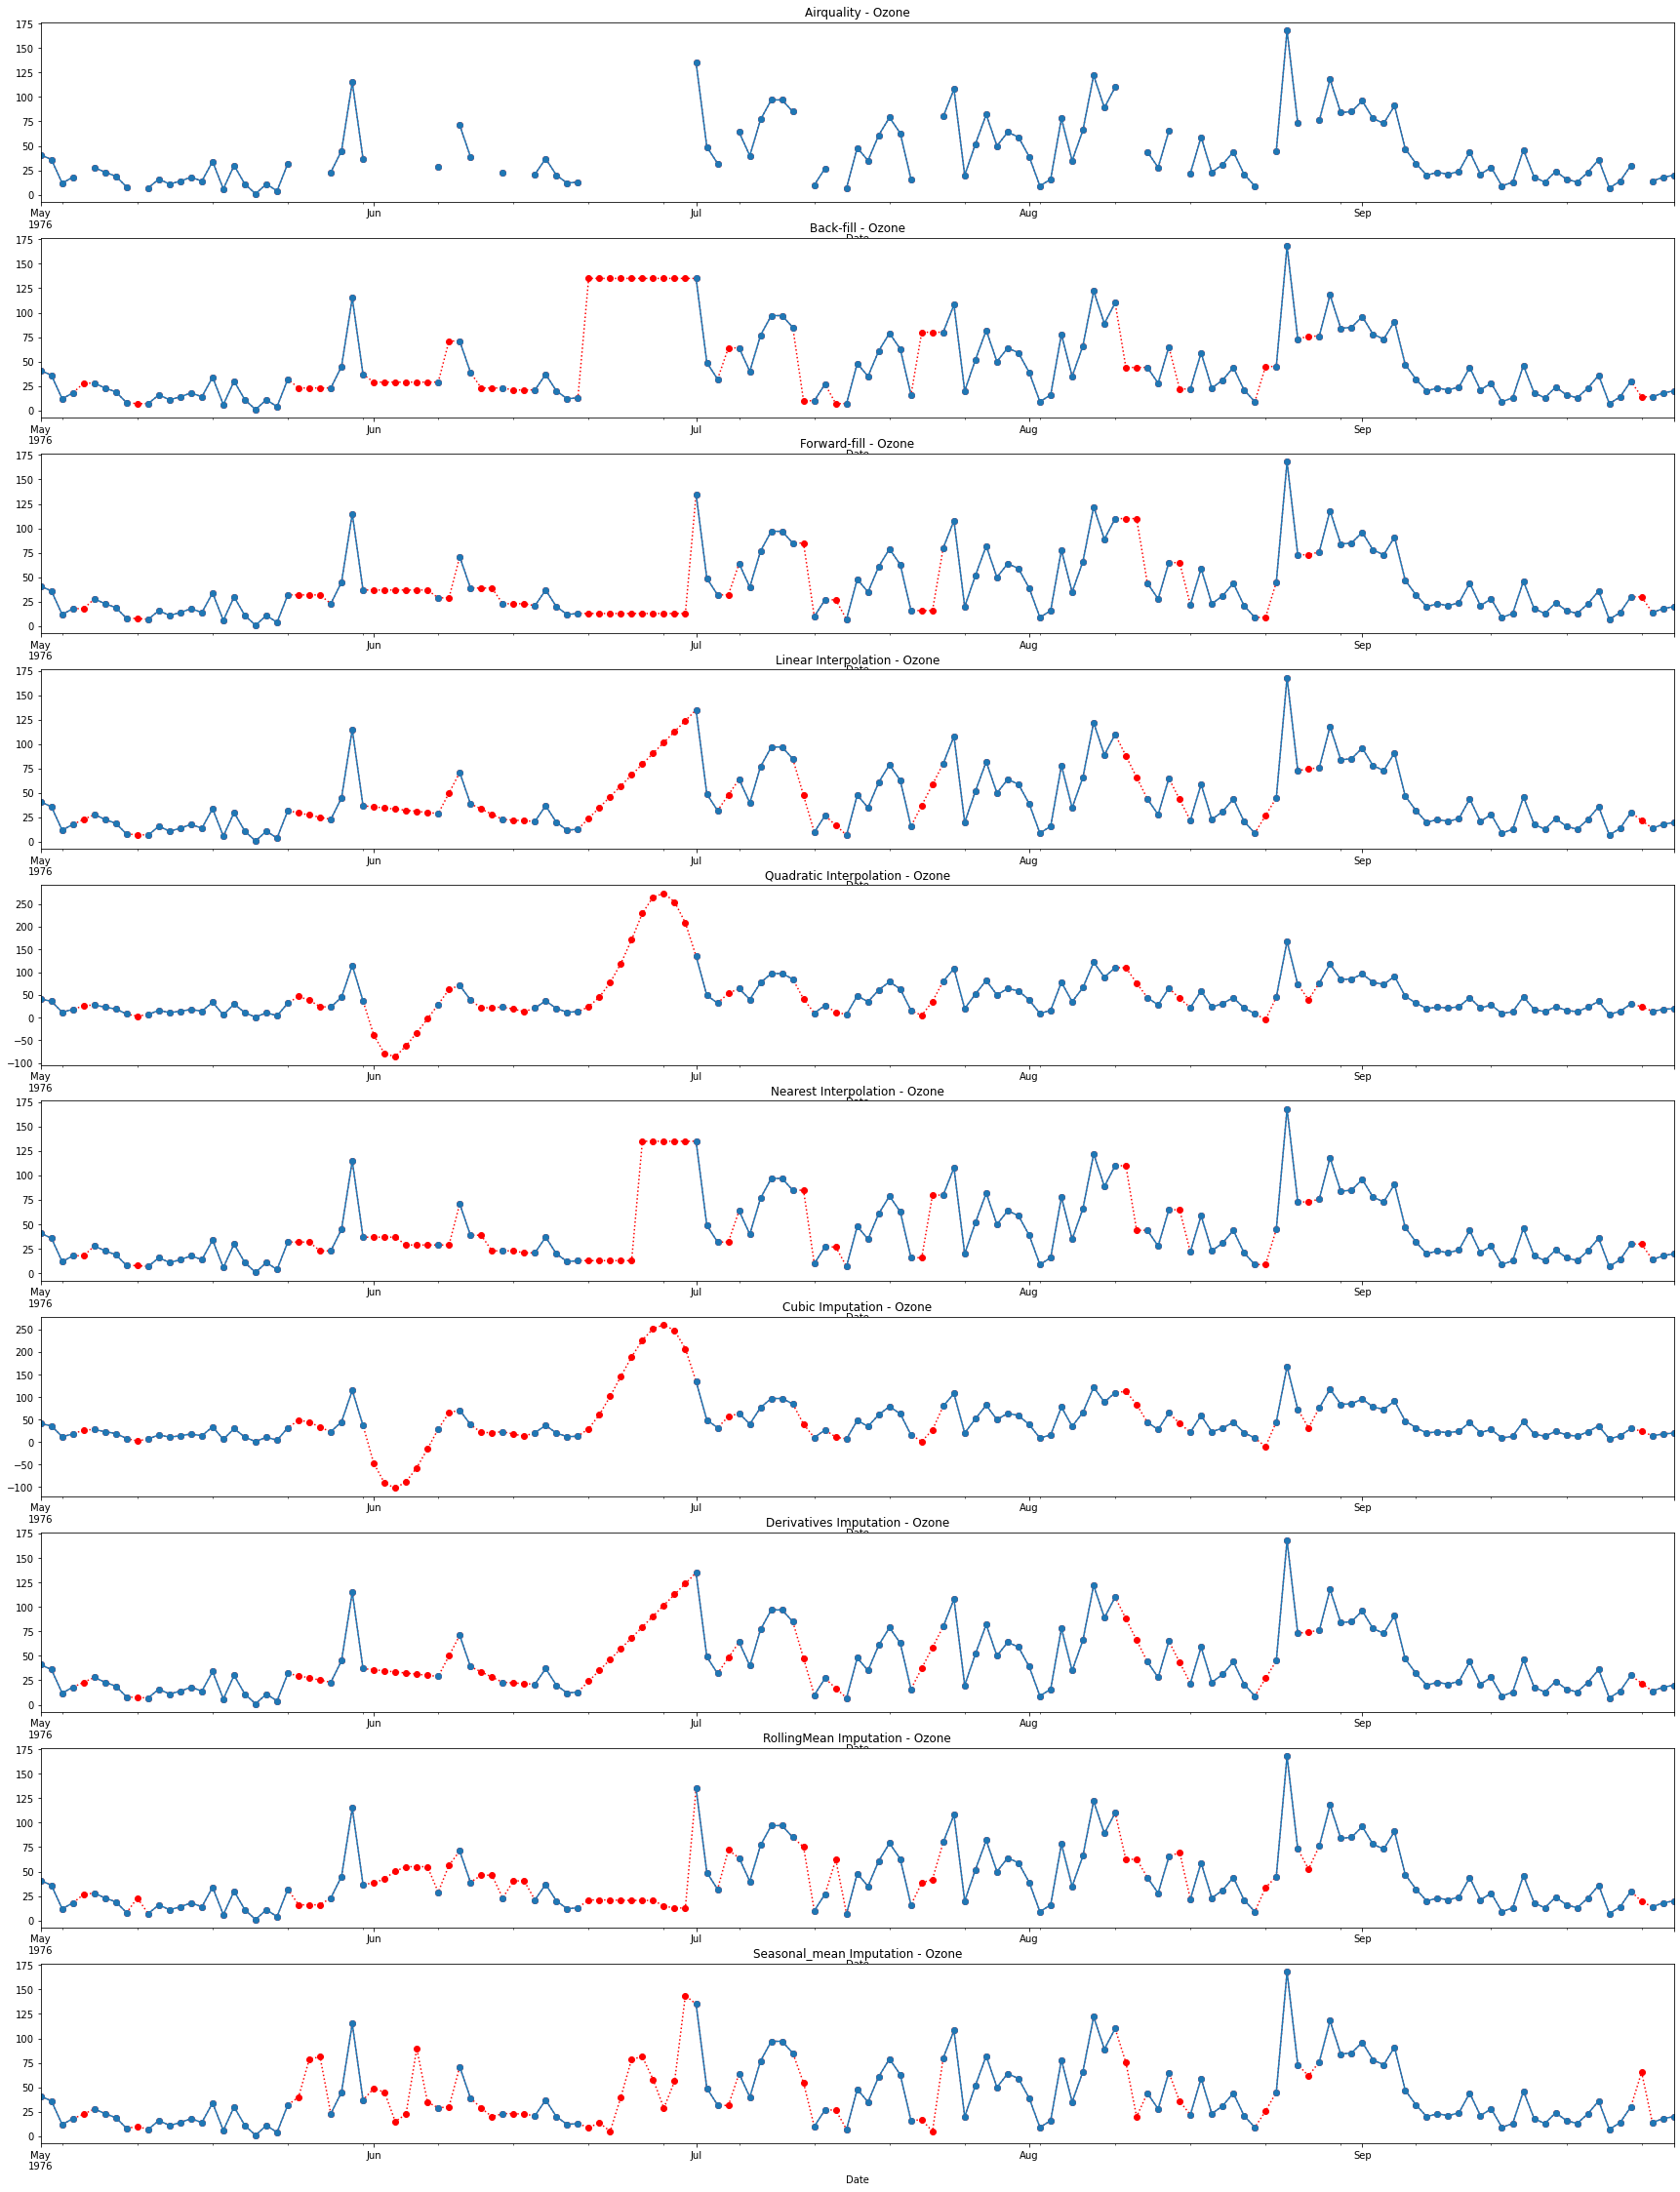

In [20]:
## !!! Please execute all the above kernels  before executing this kernel to see the output of this kernel.

fig, axes = plt.subplots(10, 1, figsize=(30, 40))

# Create a dictionary of interpolations
interpolations = {'Airquality': air1, 'Back-fill':bfill_imputed, 'Forward-fill':ffill_imputed,
                  'Linear Interpolation': linear_imput, 'Quadratic Interpolation': quadratic_imput, 
                  'Nearest Interpolation': nearest_imput,'Cubic Imputation':cubic_imput,
                  'Derivatives Imputation':derivatives_imput,'RollingMean Imputation':roll_mean,
                  'Seasonal_mean Imputation':seasonal_imput}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
  # Select and also set the title for a DataFrame
  interpolations[df_key].Ozone.plot(color='red', marker='o', 
                                 linestyle='dotted', ax=ax)
  air1.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)

plt.show()